<a href="https://colab.research.google.com/github/marioTavFer/somePython/blob/main/beta_vol_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicações de Modelos de Volatilidade Beta Dinâmico usando GARCH

# 1. Carrega as bibliotecas

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
# Carrega as bibliotecas
import numpy as np
import pandas as pd
from arch import arch_model
import yfinance as yf

# Configura os gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Carrega os dados

In [ ]:
# Carrega os dados
data = yf.download(["ITUB4.SA", "^BVSP"], start = '2015-01-01', end = '2023-06-01')["Adj Close"]

# Calcula os retornos
retornos = data.dropna().pct_change().dropna() # calcula os retornos

[*********************100%%**********************]  2 of 2 completed


# 3. Modelo

Iteration:      1,   Func. Count:      8,   Neg. LLF: 313965.44497297704
Iteration:      2,   Func. Count:     22,   Neg. LLF: 280088.86140810896
Iteration:      3,   Func. Count:     33,   Neg. LLF: 330536.25314711634
Iteration:      4,   Func. Count:     48,   Neg. LLF: 502774.7133516038
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5311.859585252506
            Iterations: 6
            Function evaluations: 58
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7.113044719940756e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9265154686.616974
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5.073683796824824e+22
Iteration:      4,   Func. Count:     46,   Neg. LLF: 6.757047371625499e+16


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004268. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002571. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      5,   Func. Count:     58,   Neg. LLF: 6974880231880.92
Iteration:      6,   Func. Count:     73,   Neg. LLF: 4.201469891454099e+16
Iteration:      7,   Func. Count:     85,   Neg. LLF: 3484363389673.907
Iteration:      8,   Func. Count:    100,   Neg. LLF: 1.970680664988823e+16
Iteration:      9,   Func. Count:    112,   Neg. LLF: 1034513117556.838
Iteration:     10,   Func. Count:    127,   Neg. LLF: 4543732917731130.0
Iteration:     11,   Func. Count:    139,   Neg. LLF: 6096147922692.168
Iteration:     12,   Func. Count:    153,   Neg. LLF: -5918.086290042704
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5918.086286083208
            Iterations: 16
            Function evaluations: 153
            Gradient evaluations: 12


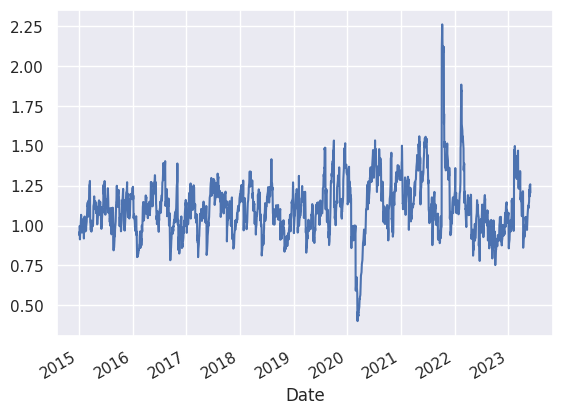

In [ ]:
# Especifica um GARCH(1,1) com distribuição t de student e assimétrica
itub_fit = arch_model(retornos["ITUB4.SA"], vol = "Garch", p = 1, o = 0, q = 1, dist = "skewt").fit()
rm_fit = arch_model(retornos["^BVSP"], vol = "Garch", p = 1, o = 0, q = 1, dist = "normal").fit()

# Passo 1
vol_itub = itub_fit.conditional_volatility
vol_rm = rm_fit.conditional_volatility

# Passo 2
itub_std_resid = itub_fit.resid / vol_itub
rm_std_resid = rm_fit.resid / vol_rm

# Passo 3
corr = np.corrcoef(itub_std_resid, rm_std_resid)[0,1]
din_cov = corr * vol_itub * vol_rm

# Passo 4
## Beta Dinâmico
din_beta = din_cov / vol_rm ** 2

din_beta.plot();
plt.show()